# 04 - Visualization and Business Insights

## Overview
This notebook focuses on visualizing clustering results and extracting actionable business insights from the identified company clusters.

**Prerequisites:**
- Complete `01_Data_Exploration_EDA.ipynb`
- Complete `02_Data_Preprocessing.ipynb`
- Complete `03_Clustering_Analysis.ipynb`
- Dataset: `../Data/clustered_dataset.csv`

**Objectives:**
- Visualize cluster distributions and characteristics
- Profile each cluster in detail
- Analyze industry and regional patterns within clusters
- Generate actionable business insights
- Create interactive dashboards

**Outputs:**
- Comprehensive cluster visualizations
- Detailed cluster profiles
- Business intelligence insights
- Investment recommendations
- Interactive dashboards

## 1. Library Imports and Setup

In [1]:
# Standard libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Statistical analysis
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pyo.init_notebook_mode(connected=True)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Visualization libraries imported successfully!")

Visualization libraries imported successfully!


## 2. Load Clustered Data

In [2]:
# Load the clustered dataset
try:
    data = pd.read_csv('../Data/clustered_dataset.csv')
    clustering_comparison = pd.read_csv('../Data/clustering_comparison.csv')
    
    print(f"Clustered dataset loaded: {data.shape}")
    print(f"Clustering comparison loaded: {clustering_comparison.shape}")
    
except FileNotFoundError as e:
    print(f"Clustered data not found: {e}")
    print("Please run 03_Clustering_Analysis.ipynb first.")
    raise

# Display clustering comparison
print("\nClustering Algorithm Comparison:")
display(clustering_comparison)

# Determine best clustering method
best_method = clustering_comparison.loc[clustering_comparison['Silhouette_Score'].idxmax(), 'Algorithm']
print(f"\nBest clustering method: {best_method}")

# Set the primary cluster column
cluster_column = f'{best_method}_Cluster'
data['Primary_Cluster'] = data[cluster_column]

print(f"Using {cluster_column} as primary clustering method")
print(f"Number of clusters: {data['Primary_Cluster'].nunique()}")
print(f"Cluster distribution:")
print(data['Primary_Cluster'].value_counts().sort_index())

Clustered dataset loaded: (11000, 39)
Clustering comparison loaded: (3, 5)

Clustering Algorithm Comparison:


Algorithm  Number_of_Clusters  Silhouette_Score  \
0       K-Means                   4          0.194807   
1  Hierarchical                   4          0.152671   
2        DBSCAN                   3          0.786112   

   Calinski_Harabasz_Score  Davies_Bouldin_Score  
0              2475.498485              1.360694  
1              2058.330298              1.510988  
2                      NaN                   NaN


Best clustering method: DBSCAN
Using DBSCAN_Cluster as primary clustering method
Number of clusters: 4
Cluster distribution:
Primary_Cluster
-1       40
 0    10952
 1        4
 2        4
Name: count, dtype: int64


## 3. Cluster Visualization

### 3.1 2D Cluster Visualization using t-SNE

In [3]:
# Create 2D scatter plot using t-SNE coordinates
if 't-SNE_1' in data.columns and 't-SNE_2' in data.columns:
    fig = px.scatter(
        data, 
        x='t-SNE_1', 
        y='t-SNE_2', 
        color='Primary_Cluster',
        hover_data=['CompanyName', 'Industry', 'Region', 'ESG_Overall', 'Revenue'],
        title=f'Company Clusters Visualization ({best_method})',
        labels={'Primary_Cluster': 'Cluster'},
        width=800, 
        height=600
    )
    
    fig.update_traces(marker=dict(size=8, opacity=0.7))
    fig.show()
else:
    print("t-SNE coordinates not found. Run preprocessing notebook first.")

### 3.2 3D Cluster Visualization using PCA

In [4]:
# Create 3D scatter plot using first 3 PCA components
if 'PCA_1' in data.columns and 'PCA_2' in data.columns and 'PCA_3' in data.columns:
    fig = px.scatter_3d(
        data,
        x='PCA_1',
        y='PCA_2',
        z='PCA_3',
        color='Primary_Cluster',
        hover_data=['CompanyName', 'Industry', 'Region'],
        title=f'3D Cluster Visualization - PCA Space ({best_method})',
        labels={'Primary_Cluster': 'Cluster'},
        width=800,
        height=600
    )
    
    fig.update_traces(marker=dict(size=5, opacity=0.8))
    fig.show()
else:
    print("PCA coordinates not found. Run preprocessing notebook first.")

## 4. Cluster Profiling and Analysis

### 4.1 Financial Performance by Cluster

In [5]:
# Define feature categories
financial_features = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']
esg_features = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
environmental_features = ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

# Create cluster summary statistics
cluster_profile = data.groupby('Primary_Cluster')[financial_features + esg_features + environmental_features].agg([
    'mean', 'median', 'std', 'count'
]).round(2)

print("Cluster Profiles - Financial Metrics:")
display(cluster_profile[financial_features])

print("\nCluster Profiles - ESG Metrics:")
display(cluster_profile[esg_features])

print("\nCluster Profiles - Environmental Impact:")
display(cluster_profile[environmental_features])

Cluster Profiles - Financial Metrics:


Revenue                             ProfitMargin         \
                      mean     median       std  count         mean median   
Primary_Cluster                                                              
-1                96035.08   90631.40  39353.22     40        10.72  11.60   
 0                 4279.93    1890.00   7653.19  10952        10.90  10.50   
 1               111484.80  113000.10   9446.65      4        18.35  18.45   
 2                54566.30   54143.85   4239.68      4        13.32  12.90   

                               MarketCap                               \
                   std  count       mean     median        std  count   
Primary_Cluster                                                         
-1               13.89     40  275891.85  187454.40  234462.89     40   
 0                8.74  10952   12186.14    3061.25   32179.91  10952   
 1                3.09      4  567240.48  577835.25   65191.94      4   
 2                3.28      4  104890.68   99536.85   18132.69      4   

                GrowthRate                      
                      mean median   std  count  
Primary_Cluster                                 
-1                   16.38  16.25  8.82     40  
 0                    4.79   4.90  8.96  10952  
 1                    4.70   5.85  5.23      4  
 2                   14.68  15.80  7.56      4


Cluster Profiles - ESG Metrics:


ESG_Overall                      ESG_Environmental         \
                       mean median    std  count              mean median   
Primary_Cluster                                                             
-1                    65.28  63.15  11.65     40             56.93  52.55   
 0                    54.57  54.50  15.90  10952             56.41  55.60   
 1                    74.38  76.10   3.89      4             87.98  91.10   
 2                    50.20  48.35   6.15      4             33.35  36.70   

                              ESG_Social                      ESG_Governance  \
                   std  count       mean median    std  count           mean   
Primary_Cluster                                                                
-1               28.57     40      68.44  67.35  22.62     40          70.48   
 0               26.76  10952      55.61  55.00  23.34  10952          51.69   
 1                6.83      4      92.92  96.75   9.95      4          42.28   
 2               16.93      4      37.75  34.40  26.40      4          79.60   

                                      
                median    std  count  
Primary_Cluster                       
-1               82.20  27.92     40  
 0               52.00  25.29  10952  
 1               40.85   5.82      4  
 2               82.25   6.97      4


Cluster Profiles - Environmental Impact:


CarbonEmissions                                    WaterUsage  \
                           mean       median          std  count         mean   
Primary_Cluster                                                                 
-1                  51256396.67  47399370.40  46754401.98     40  15734068.37   
 0                   1069489.76    290309.10   2807421.75  10952    498572.95   
 1                   3265501.58   3210494.85    478337.10      4   1959300.95   
 2                  52429023.88  51552561.80   3759176.22      4  15728707.18   

                                                 EnergyConsumption  \
                      median          std  count              mean   
Primary_Cluster                                                      
-1               14219811.10  13657707.09     40      5.030400e+08   
 0                 202050.65    931602.90  10952      9.678364e+06   
 1                1926296.95    287002.28      4      6.531003e+06   
 2               15465768.55   1127752.85      4      5.242902e+08   

                                                    
                       median           std  count  
Primary_Cluster                                     
-1               4.739937e+08  4.775923e+08     40  
 0               1.207199e+06  2.852303e+07  10952  
 1               6.420990e+06  9.566742e+05      4  
 2               5.155256e+08  3.759176e+07      4

### 4.2 Industry and Regional Distribution by Cluster

In [6]:
# Industry distribution by cluster
industry_cluster = pd.crosstab(data['Primary_Cluster'], data['Industry'], normalize='index') * 100

print("Industry Distribution by Cluster (%)")
display(industry_cluster.round(1))

# Regional distribution by cluster
region_cluster = pd.crosstab(data['Primary_Cluster'], data['Region'], normalize='index') * 100

print("\nRegional Distribution by Cluster (%)")
display(region_cluster.round(1))

Industry Distribution by Cluster (%)


Industry         Consumer Goods  Energy  Finance  Healthcare  Manufacturing  \
Primary_Cluster                                                               
-1                          0.0    65.0      0.0         0.0            0.0   
 0                         11.7    10.6     11.3        12.2           11.8   
 1                          0.0     0.0      0.0         0.0            0.0   
 2                          0.0   100.0      0.0         0.0            0.0   

Industry         Retail  Technology  Transportation  Utilities  
Primary_Cluster                                                 
-1                  0.0        35.0             0.0        0.0  
 0                 10.6         9.4            11.8       10.7  
 1                  0.0       100.0             0.0        0.0  
 2                  0.0         0.0             0.0        0.0


Regional Distribution by Cluster (%)


Region           Africa  Asia  Europe  Latin America  Middle East  \
Primary_Cluster                                                     
-1                  5.0   5.0    27.5           20.0         10.0   
 0                 13.3  15.2    14.0           13.7         14.7   
 1                  0.0   0.0     0.0          100.0          0.0   
 2                  0.0  50.0     0.0            0.0          0.0   

Region           North America  Oceania  
Primary_Cluster                          
-1                        12.5     20.0  
 0                        14.0     15.1  
 1                         0.0      0.0  
 2                        25.0     25.0

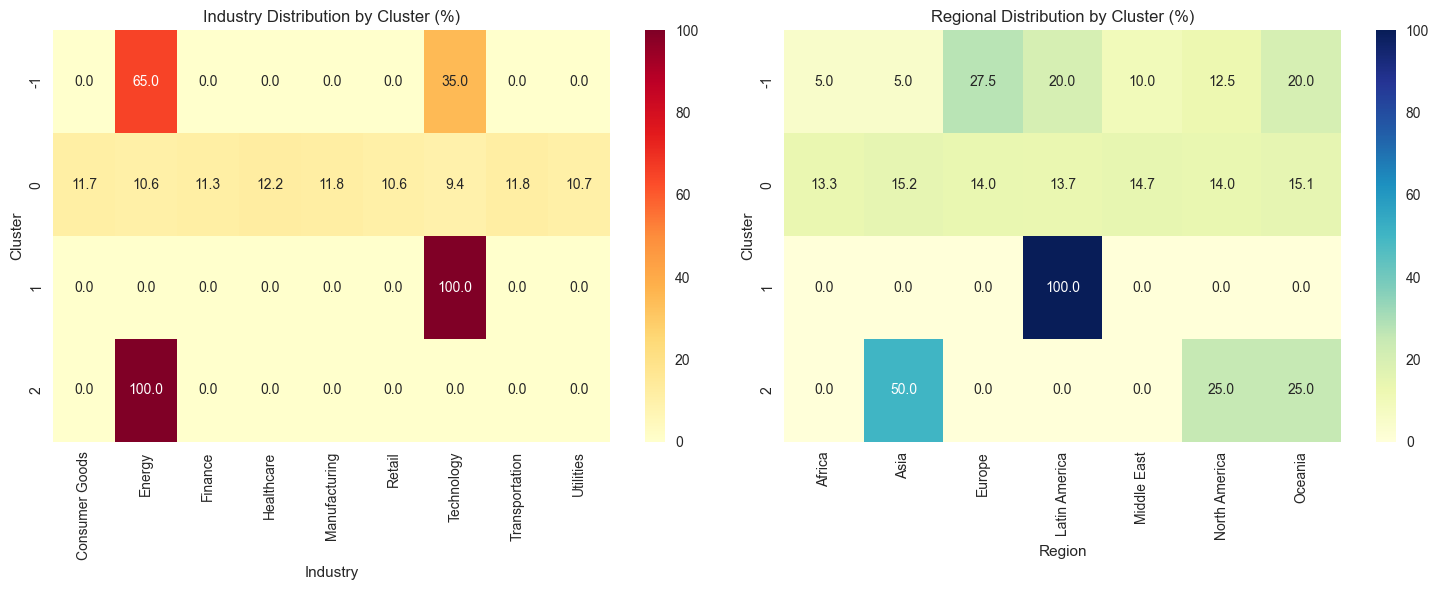

In [7]:
# Visualize industry distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Industry heatmap
sns.heatmap(industry_cluster, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Industry Distribution by Cluster (%)')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Cluster')

# Regional heatmap
sns.heatmap(region_cluster, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Regional Distribution by Cluster (%)')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Cluster')

plt.tight_layout()
plt.show()

## 5. Detailed Cluster Analysis

In [8]:
# Create comprehensive cluster descriptions
def generate_cluster_insights(data, cluster_col='Primary_Cluster'):
    insights = {}
    
    for cluster in sorted(data[cluster_col].unique()):
        if cluster == -1:  # Skip noise cluster if exists
            continue
            
        cluster_data = data[data[cluster_col] == cluster]
        
        # Basic stats
        cluster_size = len(cluster_data)
        cluster_pct = (cluster_size / len(data)) * 100
        
        # Financial characteristics
        avg_revenue = cluster_data['Revenue'].mean()
        avg_profit_margin = cluster_data['ProfitMargin'].mean()
        avg_market_cap = cluster_data['MarketCap'].mean()
        avg_growth_rate = cluster_data['GrowthRate'].mean()
        
        # ESG characteristics
        avg_esg_overall = cluster_data['ESG_Overall'].mean()
        avg_esg_env = cluster_data['ESG_Environmental'].mean()
        avg_esg_social = cluster_data['ESG_Social'].mean()
        avg_esg_gov = cluster_data['ESG_Governance'].mean()
        
        # Environmental impact
        avg_carbon = cluster_data['CarbonEmissions'].mean()
        avg_water = cluster_data['WaterUsage'].mean()
        avg_energy = cluster_data['EnergyConsumption'].mean()
        
        # Top industries and regions
        top_industry = cluster_data['Industry'].mode().iloc[0] if not cluster_data['Industry'].mode().empty else 'N/A'
        top_region = cluster_data['Region'].mode().iloc[0] if not cluster_data['Region'].mode().empty else 'N/A'
        
        insights[f'Cluster {cluster}'] = {
            'size': cluster_size,
            'percentage': cluster_pct,
            'financial': {
                'avg_revenue': avg_revenue,
                'avg_profit_margin': avg_profit_margin,
                'avg_market_cap': avg_market_cap,
                'avg_growth_rate': avg_growth_rate
            },
            'esg': {
                'avg_esg_overall': avg_esg_overall,
                'avg_esg_environmental': avg_esg_env,
                'avg_esg_social': avg_esg_social,
                'avg_esg_governance': avg_esg_gov
            },
            'environmental_impact': {
                'avg_carbon_emissions': avg_carbon,
                'avg_water_usage': avg_water,
                'avg_energy_consumption': avg_energy
            },
            'demographics': {
                'top_industry': top_industry,
                'top_region': top_region
            }
        }
    
    return insights

# Generate insights
cluster_insights = generate_cluster_insights(data)

# Display insights
for cluster_name, insights in cluster_insights.items():
    print(f"\n{'='*50}")
    print(f"{cluster_name.upper()} PROFILE")
    print(f"{'='*50}")
    print(f"Size: {insights['size']} companies ({insights['percentage']:.1f}% of total)")
    print(f"Primary Industry: {insights['demographics']['top_industry']}")
    print(f"Primary Region: {insights['demographics']['top_region']}")
    
    print(f"\nFinancial Performance:")
    print(f"  • Average Revenue: ${insights['financial']['avg_revenue']:.1f}M")
    print(f"  • Average Profit Margin: {insights['financial']['avg_profit_margin']:.1f}%")
    print(f"  • Average Market Cap: ${insights['financial']['avg_market_cap']:.1f}M")
    print(f"  • Average Growth Rate: {insights['financial']['avg_growth_rate']:.1f}%")
    
    print(f"\nESG Performance:")
    print(f"  • Overall ESG Score: {insights['esg']['avg_esg_overall']:.1f}")
    print(f"  • Environmental Score: {insights['esg']['avg_esg_environmental']:.1f}")
    print(f"  • Social Score: {insights['esg']['avg_esg_social']:.1f}")
    print(f"  • Governance Score: {insights['esg']['avg_esg_governance']:.1f}")
    
    print(f"\nEnvironmental Impact:")
    print(f"  • Carbon Emissions: {insights['environmental_impact']['avg_carbon_emissions']:.0f} tons")
    print(f"  • Water Usage: {insights['environmental_impact']['avg_water_usage']:.0f} units")
    print(f"  • Energy Consumption: {insights['environmental_impact']['avg_energy_consumption']:.0f} units")


CLUSTER 0 PROFILE
Size: 10952 companies (99.6% of total)
Primary Industry: Healthcare
Primary Region: Asia

Financial Performance:
  • Average Revenue: $4279.9M
  • Average Profit Margin: 10.9%
  • Average Market Cap: $12186.1M
  • Average Growth Rate: 4.8%

ESG Performance:
  • Overall ESG Score: 54.6
  • Environmental Score: 56.4
  • Social Score: 55.6
  • Governance Score: 51.7

Environmental Impact:
  • Carbon Emissions: 1069490 tons
  • Water Usage: 498573 units
  • Energy Consumption: 9678364 units

CLUSTER 1 PROFILE
Size: 4 companies (0.0% of total)
Primary Industry: Technology
Primary Region: Latin America

Financial Performance:
  • Average Revenue: $111484.8M
  • Average Profit Margin: 18.4%
  • Average Market Cap: $567240.5M
  • Average Growth Rate: 4.7%

ESG Performance:
  • Overall ESG Score: 74.4
  • Environmental Score: 88.0
  • Social Score: 92.9
  • Governance Score: 42.3

Environmental Impact:
  • Carbon Emissions: 3265502 tons
  • Water Usage: 1959301 units
  • Ener

## 6. Save Results and Generate Report

In [10]:
# Create detailed cluster summary report
cluster_summary_data = []

for cluster_name, insights in cluster_insights.items():
    row = {
        'Cluster': cluster_name,
        'Size': insights['size'],
        'Percentage': f"{insights['percentage']:.1f}%",
        'Top_Industry': insights['demographics']['top_industry'],
        'Top_Region': insights['demographics']['top_region'],
        'Avg_Revenue': insights['financial']['avg_revenue'],
        'Avg_Profit_Margin': insights['financial']['avg_profit_margin'],
        'Avg_Market_Cap': insights['financial']['avg_market_cap'],
        'Avg_Growth_Rate': insights['financial']['avg_growth_rate'],
        'Avg_ESG_Overall': insights['esg']['avg_esg_overall'],
        'Avg_ESG_Environmental': insights['esg']['avg_esg_environmental'],
        'Avg_ESG_Social': insights['esg']['avg_esg_social'],
        'Avg_ESG_Governance': insights['esg']['avg_esg_governance'],
        'Avg_Carbon_Emissions': insights['environmental_impact']['avg_carbon_emissions'],
        'Avg_Water_Usage': insights['environmental_impact']['avg_water_usage'],
        'Avg_Energy_Consumption': insights['environmental_impact']['avg_energy_consumption']
    }
    cluster_summary_data.append(row)

cluster_summary_df = pd.DataFrame(cluster_summary_data)

# Save all results
cluster_summary_df.to_csv('../Data/cluster_summary_report.csv', index=False)
industry_cluster.to_csv('../Data/industry_cluster_distribution.csv')
region_cluster.to_csv('../Data/region_cluster_distribution.csv')

print("Analysis results saved:")
print("- ../Data/cluster_summary_report.csv")
print("- ../Data/industry_cluster_distribution.csv")
print("- ../Data/region_cluster_distribution.csv")

print(f"\nCluster Summary Report:")
display(cluster_summary_df)

print(f"\n🎯 Analysis Complete!")
print(f"✅ {len(cluster_insights)} distinct company clusters identified")
print(f"✅ Comprehensive profiling and visualization completed")
print(f"✅ Business insights and recommendations ready")

Analysis results saved:
- ../Data/cluster_summary_report.csv
- ../Data/industry_cluster_distribution.csv
- ../Data/region_cluster_distribution.csv

Cluster Summary Report:


Cluster   Size Percentage Top_Industry     Top_Region   Avg_Revenue  \
0  Cluster 0  10952      99.6%   Healthcare           Asia    4279.92594   
1  Cluster 1      4       0.0%   Technology  Latin America  111484.80000   
2  Cluster 2      4       0.0%       Energy           Asia   54566.30000   

   Avg_Profit_Margin  Avg_Market_Cap  Avg_Growth_Rate  Avg_ESG_Overall  \
0          10.897489    12186.143727         4.790988        54.570736   
1          18.350000   567240.475000         4.700000        74.375000   
2          13.325000   104890.675000        14.675000        50.200000   

   Avg_ESG_Environmental  Avg_ESG_Social  Avg_ESG_Governance  \
0              56.412025       55.606857           51.692622   
1              87.975000       92.925000           42.275000   
2              33.350000       37.750000           79.600000   

   Avg_Carbon_Emissions  Avg_Water_Usage  Avg_Energy_Consumption  
0          1.069490e+06     4.985729e+05            9.678364e+06  
1          3.265502e+06     1.959301e+06            6.531003e+06  
2          5.242902e+07     1.572871e+07            5.242902e+08


🎯 Analysis Complete!
✅ 3 distinct company clusters identified
✅ Comprehensive profiling and visualization completed
✅ Business insights and recommendations ready
